
<p style='font-size: 35px;
           font-family: "arial";
           background-color: #D0D0D0;
           text-align: center;
           padding: 0.8em 0.5em'>
    <strong>Review of Oxford Temperature Measurements<br><br>1850 - 2019</strong>
</p>
      


<p style='background-color: #99CCCC;
           font-size: 22px;
          font-weight: bold;
           padding: 0.5em 0.5em'>Introduction</p>

<h1 style='font-family: "arial";
           font-size: 25px;'>The NULL Hypothesis</h1>
           
<h1 style='font-family: "arial";
           font-size: 25px;'>The temperature of the planet Earth is directly correlated with the concentration of CO2 in the Earths atmosphere.</h1>

<p style='font-size: 18px;'>There a few simple rules when looking at data.</p>

<ul style='list-style: square;'>
    <li>Correlation is not causation</li>
    <li>Correlation is not causation</li>
    <li>Correlation is not causation</li>
    </ul>
    
<p style='font-size: 18px;'>Unfortunately, there isn't a great deal of data to go on. Surface temperatures have been measured for only a few hundred years to any degree of accuracy. Atmospheric CO2 levels are in an even greater perilous state than temperatures.</p>

<p style='font-size: 18px;'>I have 2 simple data sets.</p>
<ul style='list-style: square;'>
    <li>The monthly Temperature Maximum and Minimum from Oxford in the UK from 1850 - June 2019</li>
    <li>The measurement of atmospheric concentration of CO2 from 1959 - 2018 from NOAA</li>
    </ul>

<p style='font-size: 18px;'>Is it possible to generalise from the particular to the universal in terms of AGW? Well it must be. Everywhere on the planet must be getting hotter due to the theory of back radiation from a trace gas, CO2.</p>

<p style='font-size: 18px;'>I will be using Python with its numerous Scientific and Statistical code libraries to help me. I will present the findings, with a full reference to the techniques and computer code used to arrive at conclusions.</p>

<p style='font-size: 18px;'>To start with, I will use the data from:</p>

**[Link to Met Office data.](https://www.metoffice.gov.uk/research/climate/maps-and-data/historic-station-data)** 
<p style='font-size: 18px;'>to analyse the basic data.</p>

<ul style='list-style: square;'>
    <li>Draw a heat map of the dataset from 1850 to 2019 for a quick visual.</li>
    <li>Construct a scatter plot of the data set for a single month</li>
    <li>Determine a linear regression for the months data</li>
    <li>Remove the 'noise' via a rolling Decadal average</li>
    <li>Look at some 'clustering' of the measured data</li>
    <li>Analyse Average Yearly Temperatures</li>
    <li>Compare the rolling annual average temperatures of Oxford</li>
    <li>Look at a more advanced model than simple linear regression</li>
 </ul>



<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em'>There is also a nice table from Oxford University's School of Geography and Environment which may come in handy.</p>

In [161]:
robs = pd.read_html('https://www.geog.ox.ac.uk/research/climate/rms/summary.html')
robs = pd.DataFrame(robs[0])
robs.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,NaN,Period,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
1,Mean air temperature,1815 - 2015,3.8,4.2,5.8,8.3,11.6,14.9,16.6,16.1,13.7,10.1,6.5,4.6,9.7
2,Highest mean temperature and year,1815 - 2015,7.7,8.0,9.5,13.0,15.3,18.6,20.8,19.9,17.4,13.8,10.4,10.8,11.5
3,Highest mean temperature and year,1815 - 2015,1916,1990,1938,2011,1833,1846,1983,1997,2006,2001,1994,2015,2014
4,Lowest mean temperature and year,1815 - 2015,-3.2,-2.6,1.9,4.9,9.0,11.8,13.8,13.3,11.0,6.8,2.9,-1.6,7.5


<p style='background-color: #99CCCC;
           font-size: 22px;
          font-weight: bold;
           padding: 0.5em 0.5em'>Setup the Python Environment</p>

<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em'>Import the libraries to be used. These include the packages from scipy and sickit-learn.</p>

In [142]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import seaborn as sns
import folium
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

<p style='background-color: #99CCCC;
           font-size: 22px;
          font-weight: bold;
           padding: 0.5em 0.5em'>Read the Met Office Data into Pandas</p>

<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em'>Here is a map showing the approximate location of the weather station given the Met Office co-ordinates. I believe it's actually at the Radcliffe Observatory.</p>

In [69]:
station = (51.7607,-1.2625)
my_map = folium.Map(location=station,zoom_start=17)
#inserting marker
folium.Marker(
    station,
    popup = 'Oxford Weather Station',
    tooltip='Oxford Weather Station'
).add_to(my_map)
my_map

<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em'>Read the CSV file containing the data.<br>It is a local copy of the original data with the extraneous headers removed</p>

In [70]:
oweather = pd.read_csv('OxfordWeather2019copy.csv')
#Use a cheeky '\033[1m' to print it in bold!
print('\033[1m'+'Length of Data set is ',len(oweather.Year))
oweather.isnull().count()

Length of Data set is  1998


Year     1998
Month    1998
TmaxC    1998
TminC    1998
af       1998
rain     1998
sun      1998
dtype: int64

<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em'>The main DataFrame is 'oweather'.A Pandas DataFrame(DF) is similar to a spreadsheet but the data manipulations are easier and replicatable. They are aslo easy to critique and amend.<br>It's worthwhile checking the data types out to be sure that everything is OK.</p>

In [71]:
oweather.dtypes

Year       int64
Month      int64
TmaxC    float64
TminC    float64
af         int64
rain     float64
sun      float64
dtype: object

<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em'>I can check out 1 years worth of data using the Pandas 'loc' method.<br>Use a lamda function to pick out the data for the Year you are interested in</p>

In [149]:
oweather.loc[lambda oweather: oweather['Year'] == 1916]

,Year,Month,TmaxC,TminC,af,rain,sun
756,1916,1,10.3,5.1,0,38.1,0.0
757,1916,2,6.5,1.1,10,97.3,0.0
758,1916,3,6.5,1.1,9,131.8,0.0
759,1916,4,13.9,4.3,1,25.2,0.0
760,1916,5,17.3,7.6,0,51.6,0.0
761,1916,6,15.9,8.1,0,46.9,0.0
762,1916,7,20.9,11.0,0,45.3,0.0
763,1916,8,21.8,12.6,0,102.9,0.0
764,1916,9,17.6,9.0,0,23.3,0.0
765,1916,10,14.6,8.2,2,93.7,0.0


<p style='background-color: #99CCCC;
           font-size: 22px;
          font-weight: bold;
           padding: 0.5em 0.5em'>Read the CO2 data into Pandas</p>

<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em'>I want to look at the CO2 levels measured at Mauna Lua to have data on the increase in Parts Per Million.<br> So let's get the data from this source.</p>

**[CO2 Levels 1959 - 2018](ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_annmean_mlo.txt)**

In [73]:
df_co2 = pd.read_csv("monaluaco2stripped.txt",delimiter=r"\s+")
df_co2.drop(['unc'],axis=1,inplace=True)
df_co2.rename(columns={'mean':'PPM'},inplace=True)
df_co2.head(2)

,year,PPM
0,1959,315.97
1,1960,316.91


<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em'>This is the graph of CO2 growth we are not used to seeing. A linear growth since 1949. Only the Y axis ends at 10,000. Had it been drawn sccurately to reflect Parts per Million, there would be nothing to see! </p>

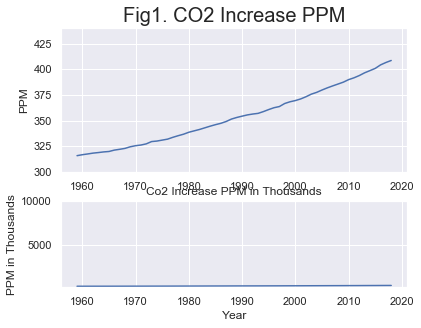

In [74]:
fig=plt.figure()
ax1 = fig.add_axes([0.1,0.5,0.8,0.5],ylim=(300,440))
plt.ylabel('PPM')
plt.title('Fig1. CO2 Increase PPM',fontsize=20)

ax2 = fig.add_axes([0.1,0.1,0.8,0.3],ylim=(200,10000))
plt.title('Co2 Increase PPM in Thousands')

ax1.plot(df_co2.year,df_co2.PPM)
plt.ylabel('PPM in Thousands')
ax2.plot(df_co2.year,df_co2.PPM)
plt.xlabel('Year');

<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em'>It's possible to find out the details of a linear regression for the CO2 data using scipy.stats.</p>

In [75]:
lm = LinearRegression()
X = df_co2[['year']]
Y = df_co2['PPM']
lm.fit(X, Y)
Yhat = lm.predict(X)

C = lm.intercept_
M = lm.coef_
print(f'c = {C:2.5f}')
print(f'm = {M[0]:2.5f}')

c = -2758.94368
m = 1.56567


<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em'>The linear equation for CO2 is<br> <strong>Y = 1.56567(X) + (- 2758.94368)</strong><br>where X is the Year.</p>

<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em'>I can check the R<sup>2</sup> value and some other details.</p>

In [76]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_co2['year'], df_co2['PPM'])
print(f'slope: {slope:2.4f},\nintercept: {intercept:2.4f},\nRsquared: {r_value**2:2.4f}')

slope: 1.5657,
intercept: -2758.9437,
Rsquared: 0.9841


<p style='background-color: #99CCCC;
           font-size: 22px;
          font-weight: bold;
           padding: 0.5em 0.5em'>Exploring the Met Office data</p>

<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em;
          line-height: 1.6;'>
I can start by using the Pandas <strong>groupby</strong> and <strong>pivot</strong> methods to manipulate the data into a format where Columns are Month, Rows are Year and the values are the maximum Temperature in centigrade (TmaxC) for each Month. Round the mean down to 2 decimal places to make it readable and make it easier to read.
</p>

In [77]:
df_View1 = oweather[['Year','Month','TmaxC']]
df_group1 = df_View1.groupby(['Year','Month'],as_index=False).mean().round(2)
df_pivot_group1 = df_group1.pivot(index='Year',columns='Month')
df_pivot_group1.tail()

TmaxC                                                                  
Month    1     2     3     4     5     6     7     8     9     10    11    12
Year                                                                         
2015    8.4   7.5  11.4  15.9  16.8  21.1  22.6  21.3  18.4  15.1  13.1  13.4
2016    9.4   9.1  10.2  12.9  18.4  20.0  23.3  23.5  20.9  15.1   9.4   9.6
2017    7.3   9.5  13.7  15.1  19.0  22.7  23.3  21.4  18.5  16.1  10.7   8.3
2018    8.9   6.4   9.1  14.2  19.9  22.8  27.4  23.4  20.4  15.6  11.7  10.2
2019    7.1  11.7  12.3  15.1  17.4  19.8   NaN   NaN   NaN   NaN   NaN   NaN

<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em'> A Seaborn plot will produce a 'heat' map of the entire data set.</p>

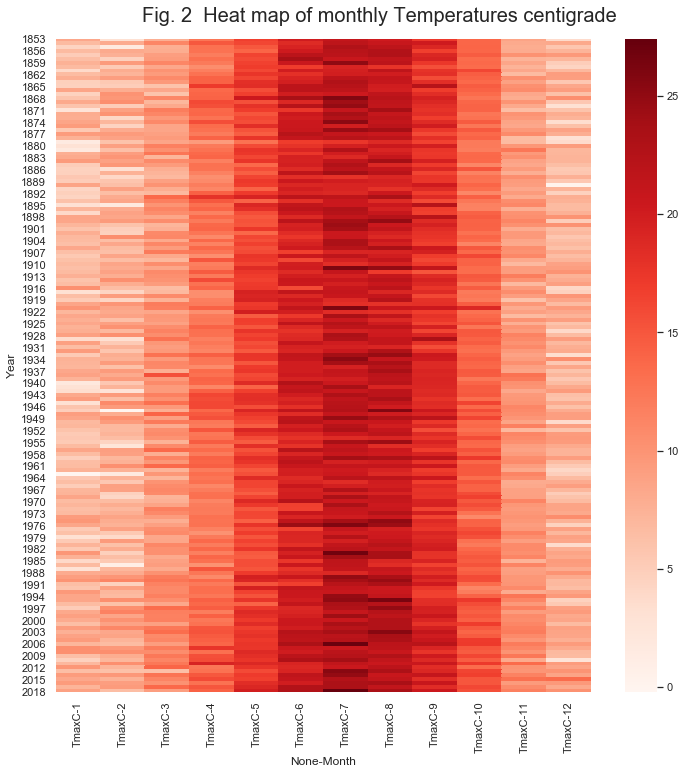

In [78]:
plt.figure(figsize=(12,12))
plt.figtext(.5,.9,'Fig. 2  Heat map of monthly Temperatures centigrade', 
            fontsize=20, ha='center')
plt.ylabel('Year')
plt.ylabel('Month')
sns.heatmap(data=df_pivot_group1,cmap='Reds');

---

<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em'>Pandas makes it easy to produce basic stats foreach month of the data. Use the pandas <strong>.T</strong> method to flip the table and make it easier to read.</p>

In [79]:
df_pivot_group1.describe().T

count       mean       std   min     25%    50%     75%   max
      Month                                                               
TmaxC 1      167.0   6.778443  1.991915  -0.2   5.500   6.80   8.400  10.4
      2      167.0   7.478443  2.242796  -0.2   6.300   7.90   9.050  11.7
      3      167.0  10.034731  1.871084   6.0   8.550  10.10  11.200  15.5
      4      167.0  13.245509  1.618109   9.5  12.200  13.00  14.200  19.4
      5      167.0  16.764072  1.493166  12.9  15.700  16.80  17.700  20.4
      6      167.0  19.952695  1.590969  15.9  18.950  19.90  21.050  24.4
      7      166.0  21.850602  1.993193  17.5  20.500  21.60  23.275  27.4
      8      166.0  21.286145  1.732013  17.1  20.100  21.20  22.350  26.4
      9      166.0  18.564458  1.537137  15.2  17.525  18.55  19.500  23.2
      10     166.0  14.211446  1.372033  11.0  13.400  14.10  14.975  18.9
      11     166.0   9.716265  1.443325   6.1   8.725   9.80  10.675  13.5
      12     166.0   7.376506  1.924670   0.2   6.200   7.50   8.800  13.4

<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em'>Already we can see the summary of the data gives some insights.
The count of data goes from 167 to 166 after June because this is where the data finishes. i.e. June 2019.
It is interesting that February has the highest StD of all months by quite some margin.
</p>

<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em'>The 'hottest' months are obviously, July and August.
July looks to be the hottest month of the year with the highest mean, highest max and the lowest minimum temperature. For this exercise, I'm going to focus on July.<br>I will create a new DF to concentrate on July and then create a rolling average of the data to try and reduce noise and see if any pattern emerges.<br>I have chosen 25 years because other studies I have seen have used 13 months to average out over 1 year or somewhere between 3 and 5 years. Let's see what will happens with a longer period.
</p>


In [80]:
rolling_average = 25

In [81]:
df_July = pd.DataFrame(df_pivot_group1.TmaxC[7])
df_July.reset_index(inplace=True)
df_July.rename(columns={7:'July'},inplace=True)
df_July['Rolling Average'] = df_July.iloc[:,1].rolling(window=rolling_average).mean()
df_July.sample(5)

,Year,July,Rolling Average
104,1957,21.5,21.928
142,1995,25.1,22.316
135,1988,18.9,21.660
78,1931,19.6,20.952
46,1899,23.8,20.992


<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em'>
    Now that we have the DataFrame <strong>df_July</strong>, with all data measurements and a rolling average, we can look at some basic stats.


In [82]:
MAX =  df_July[['Year','July']].max()
MIN =  df_July[['Year','July']].min()
MEAN = df_July[['July']].mean()
MEDIAN = df_July[['July']].median()
MODE = df_July[['July']].mode()

print('\033[1m')
print(f'Maximum July temperature was in Year {MAX[0]:3.0f} and was {MAX[1]} Centigrade')
print(f'Minimum July temperature was in Year {MIN[0]:3.0f} and was {MIN[1]} Centigrade')
print(f'Mean July temperature was {MEAN[0]:3.2f} Centigrade')
print(f'Mode July temperature for {MODE} Centigrade')
print(f'Median July temperature was {MEDIAN[0]} Centigrade')


Maximum July temperature was in Year 2019 and was 27.4 Centigrade
Minimum July temperature was in Year 1853 and was 17.5 Centigrade
Mean July temperature was 21.85 Centigrade
Mode July temperature for    July
0  20.8
1  21.1 Centigrade
Median July temperature was 21.6 Centigrade


<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em'>I want to see if the data is representative of a normal distribution. Pandas allows me to run a Shapiro test to check this via scipy stats package.
But first we have to rop off 2019 from the data. The Null values in 2019 throw a wobbly. A value of 0.05 has been used as the test for significance.</p>

<p style='background-color: #99CCCC;
           font-size: 22px;
          font-weight: bold;
           padding: 0.5em 0.5em'>Exploring the Met Office data for the Month of July</p>

In [83]:
df_July.drop(df_July.index[166],inplace=True)

stat, p = stats.shapiro(df_July.July)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample passes for normality')
else:
	print('Sample is not normal')

Statistics=0.985, p=0.076
Sample passes for normality


<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em'>I can plot the combined data now using Seaborn which draws a linear regression line through the data and shows a scatter plot of Tmaxc and the rolling average.</p> 

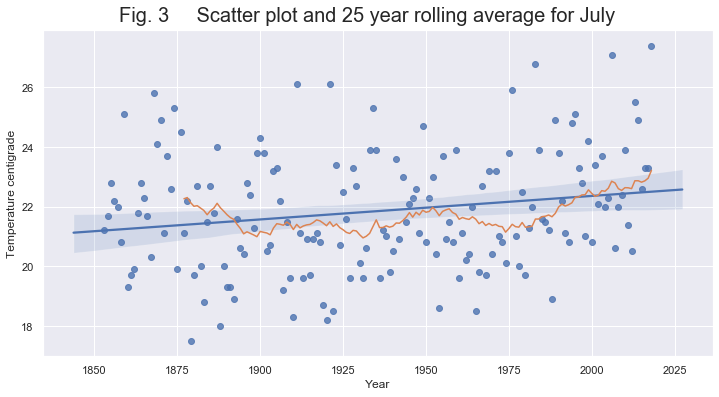

In [84]:
sns.set(rc={'figure.figsize':(12,6)})
fig, ax = plt.subplots()
plt.figtext(.5,.9,f'Fig. 3     Scatter plot and {rolling_average} year rolling average for July', 
            fontsize=20, ha='center')
sns.regplot(df_July.Year,df_July.July,ax=ax)
plt.xlabel('Year')
plt.ylabel('Temperature centigrade')
plt.plot(df_July.Year,df_July['Rolling Average']);

<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em'>The addition of a 25 year rolling average highlights some downward and upwards trens within the data. Bear in mind the scale of the graph which can be misleading.
There are 3 points which are higher than any other points in the data and it would be worth while finding out where they are. I will use the pandas <strong>.loc</strong> method to check for Years with a TmaxC over 26<sup>o</sup></p>

In [85]:
df_July.loc[lambda df_July: df_July['July'] > 26]

,Year,July,Rolling Average
58,1911,26.1,21.404
68,1921,26.1,21.492
130,1983,26.8,21.584
153,2006,27.1,22.852
165,2018,27.4,23.216


<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em'>And the years are 1983, 2006 and 2018. 2019 which was not included was also 27.4<sup>o</sup></p>

<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em'>We can deduce the formula for the line that Seaborn has kindly drawn for us by using the LinearRegression library from ScikitLearn.</p>

In [86]:
lm = LinearRegression()
X = df_July[['Year']]
Y = df_July['July']
lm.fit(X, Y)
Yhat = lm.predict(X)

C_July = lm.intercept_
M_July = lm.coef_[0]

In [87]:
print(f'The equation for the linear regression July is: Y = {M_July:2.5f} * Year + {C_July:2.5f}')

The equation for the linear regression July is: Y = 0.00789 * Year + 6.58809


<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em'>Yhat is the variable storing the predicted values for the data set based on the linear regression model. Let's have a look at how they stack up by extracting a sample of 10 points.</p>

In [88]:
df_July['Yhat']= Yhat
df_July.sample(5)

,Year,July,Rolling Average,Yhat
112,1965,18.5,21.580,22.083227
47,1900,24.3,21.168,21.570665
69,1922,18.5,21.336,21.744147
59,1912,21.1,21.288,21.665292
93,1946,22.3,21.648,21.933401


<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em'>I can check the R<sup>2</sup> value and some other details.</p>

In [89]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_July['Year'], df_July['July'])
print(f'slope: {slope:2.4f},\nintercept: {intercept:2.4f},\nRsquared: {r_value**2:2.4f}')

slope: 0.0079,
intercept: 6.5881,
Rsquared: 0.0362


<p style='background-color: #D0D0D0;
           font-size: 18px;
          padding: 0.5em 0.5em'>The Linear Model has an R<sup>2</sup> value of 0.362 which hardly explains any of the data..</p>

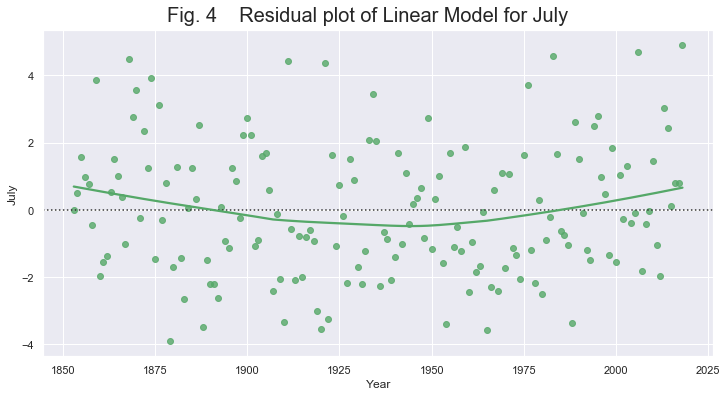

In [90]:
fig, ax = plt.subplots()
plt.figtext(.5,.9,f'Fig. 4    Residual plot of Linear Model for July', 
            fontsize=20, ha='center')
plt.xlabel('Year')
plt.ylabel('Residual')
sns.residplot(x=df_July['Year'],y=df_July['July'], lowess=True, color="g");

<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em'>Seaborn kindly plots a Lowess line. In this case we would have perhaps missed the bow in the line due to the good scatter of the residual points.</p>

In [91]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_July.Year[24:],
                                                               df_July['Rolling Average'][24:])
print(f'slope: {slope:2.4f},\nintercept: {intercept:2.4f},\nRsquared: {r_value**2:2.4f}')

slope: 0.0069,
intercept: 8.1902,
Rsquared: 0.3150


<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em'>It would be interesting to see if there are any clusters in the raw data. I used 5 clusters based on the peaks and troughs from the rolling average.</p>

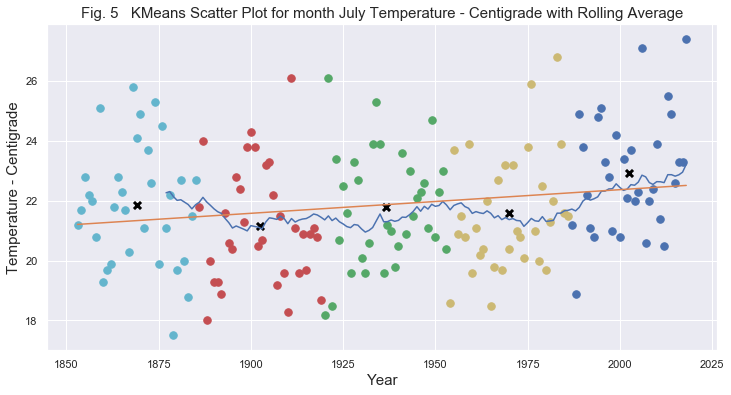

In [92]:
#This grabs the data for the month we want to look at and
#converts it into a numpy array for further analysis
md = pd.DataFrame()
md['Year']=df_July.Year
md['July']=df_July.July
X =np.array(md)

#Use sklearn Kmeans to analyse the data
#Setup the colours for the clusters
colors=['g.','r.','y.','b.','c.']
clf = KMeans(n_clusters=5,n_init=30,max_iter=900) 
#THIS DEFINES THE NUMBER OF CLUSTERS TO LOOK FOR ETC.

clf.fit(X)
centroids = clf.cluster_centers_
labels = clf.labels_

plt.figure(figsize=(12,6))
plt.xlabel('Year',fontsize=15)
plt.ylabel('Temperature - Centigrade',fontsize=15)
plt.title('Fig. 5   KMeans Scatter Plot for month July Temperature - Centigrade with Rolling Average',
          fontsize=15)
for i in range(len(X)):
    plt.plot(X[i][0],
            X[i][1],
            colors[labels[i]],
            markersize=15)
plt.scatter(centroids[:,0],
           centroids[:,1],
            marker='x',
            s=50,
            linewidth=3,
           color='black')
plt.plot(df_July.Year,df_July['Rolling Average'])
plt.plot(df_July.Year,0.00789 * df_July.Year + 6.588091);

<p style='background-color: #D0D0D0;
           font-size: 18px;
           padding: 0.5em 0.5em'>Interestingly, the KMeans algorithm has picked out the clusters which roughly correspond to the Rolling average line.</p>


<p style='background-color: #00ff00;
           font-size: 22px;
          font-weight: bold;
           padding: 0.5em 0.5em'>Exploring the Met Office Average Yearly Data</p>

<p style='background-color: #8cff66;
           font-size: 18px;
           padding: 0.9em 0.5em'>What if we look at the Annual Mean temperatures over the data set? I need to drop off 2019 as it's not a full year. I need to create some new DF's base on our original pivot table for the original data using a simple <strong>.mean</strong> method.</p>

In [93]:
df_View1.dropna()
df3 = df_View1.copy()
df3.drop(df3.index[1992:1998],inplace=True)

grouped = df3.groupby('Year')['TmaxC'].mean()
grouped =pd.DataFrame(grouped)
grouped.reset_index(inplace=True)
grouped.sample(5)

,Year,TmaxC
165,2018,15.833333
98,1951,13.641667
154,2007,15.341667
53,1906,14.283333
126,1979,13.183333


<p style='background-color: #8cff66;
           font-size: 18px;
           padding: 0.9em 0.5em'>
For comparison with the analysis for July, we should also look at a rolling average.
First create the rolling average and then plot with Seaborn regplot. We still have to work out the linear regression equation as Seaborn doesn't give it.</p>

In [94]:
grouped['rolling_average'] = grouped.iloc[:,1].rolling(window=rolling_average).mean()

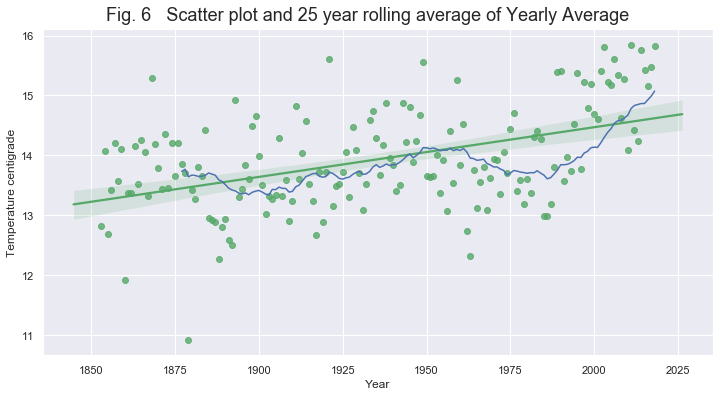

In [95]:
fig, ax = plt.subplots()
plt.figtext(.5,.9,f'Fig. 6   Scatter plot and {rolling_average} year rolling average of Yearly Average', 
            fontsize=18, ha='center')
sns.regplot(grouped.Year,grouped.TmaxC,color='g')
plt.xlabel('Year')
plt.ylabel('Temperature centigrade')
plt.plot(grouped.Year,grouped.rolling_average);

<p style='background-color: #8cff66;
           font-size: 18px;
           padding: 0.9em 0.5em'>
<strong>As a matter of interest, it would be nice to know when that horrendously low value was.</strong></p>

In [96]:
grouped.loc[lambda grouped: grouped['TmaxC'] < 11.0]

,Year,TmaxC,rolling_average
26,1879,10.916667,13.64


<p style='background-color: #8cff66;
           font-size: 18px;
           padding: 0.9em 0.5em'>
And here is the data for the year 1879:</p>


In [97]:
oweather.loc[lambda oweather: oweather['Year'] == 1879]

,Year,Month,TmaxC,TminC,af,rain,sun
312,1879,1,1.6,-2.8,27,76.5,0.0
313,1879,2,6.0,1.1,9,84.6,0.0
314,1879,3,8.6,1.1,10,22.3,0.0
315,1879,4,9.5,2.4,7,62.1,0.0
316,1879,5,12.9,5.2,3,57.6,0.0
317,1879,6,17.0,10.2,0,110.7,0.0
318,1879,7,17.5,11.4,0,86.8,0.0
319,1879,8,18.7,11.8,0,128.7,0.0
320,1879,9,16.6,9.5,0,73.6,0.0
321,1879,10,12.2,6.0,0,18.6,0.0


<p style='background-color: #8cff66;
           font-size: 18px;
           padding: 0.9em 0.5em'>
A link to 1879 <a href="https://www.netweather.tv/forum/topic/33222-1879-a-very-cold-year/" > being a very cold year</a> and a more in depth look <a href="https://wattsupwiththat.com/2013/10/04/the-great-climate-shift-of-1878/"> here</a>
</p>

<p style='background-color: #8cff66;
           font-size: 18px;
           padding: 0.9em 0.5em'>
There is also a nice cluster of high data points between the mid 1980's until 2018.
Three El Nino events calssed as Very Strong were in 1982-83, 1997-98 and 2015-16. It is pure conjecture given my data to say they are related, but it is worth mentioning.<br> <strong>Scipy stats</strong> can be used, again, to work out the equation of the linear regression.
</p>

In [98]:
lm = LinearRegression()
X = grouped[['Year']]
Y = grouped['TmaxC']
lm.fit(X, Y)
YhatYear = lm.predict(X)

CYear = lm.intercept_
MYear = lm.coef_
print(f'c = {CYear:2.5f}')
print(f'm = {MYear[0]:2.5f}')

c = -2.13667
m = 0.00830


<p style='background-color: #8cff66;
           font-size: 18px;
           padding: 0.9em 0.5em'>So the Linear regression model for Average Annual Tmax is <strong>Y = 0.00830(X) + -2.13667</strong> where X is the Year.<br>Again, Residuals plot should be used to check out the linear regression model.</p>

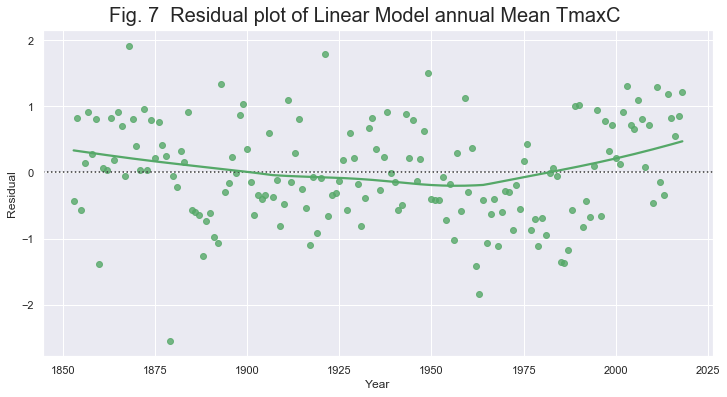

In [99]:
fig, ax = plt.subplots()
sns.residplot(x=grouped['Year'],y=grouped['TmaxC'], lowess=True, color="g")
plt.figtext(.5,.9,f'Fig. 7  Residual plot of Linear Model annual Mean TmaxC ', 
            fontsize=20, ha='center')
plt.xlabel('Year')
plt.ylabel('Residual');

<p style='background-color: #8cff66;
           font-size: 18px;
          padding: 0.9em 0.5em'><strong>The Linear regression Model Equations</strong>
          
        
   <ul style='list-style: square;
                       background-color: #FFFFCC;
                       font-size: 18px;
                       padding: 0.9em 0.6em'>
                        <li>The linear equation for the increase in atmospheric CO2 in PPM is: <strong><br>Y = 1.56567(X) + (- 2758.94368)</strong>.</li>
                        <li>The linear equation for the increase in Temperature from 1850 until present day in Oxford UK in July is<br> <strong>Y = 0.00789(X) + 6.588091</strong></li>
                        <li>The linear equation for the Mean Annual temperatures from 1850 until present day in Oxford Uk is <br><strong>Y = 0.00830(X) + (-2.13667)</strong></li>
    </ul>
</p>

<p style='background-color: #00ff00;
           font-size: 22px;
          font-weight: bold;
           padding: 0.5em 0.5em'>Exploring the Met Office Average Yearly Data Rolling Average</p>

<p style='background-color: #8cff66;
           font-size: 18px;
          padding: 0.9em 0.5em'>Now I want to find out the Linear regression model for the rolling average data. I need to drop the Null or Nan values</p>

In [100]:
df_rolling = grouped.dropna().copy()

lm = LinearRegression()
X = df_rolling[['Year']]
Y = df_rolling['rolling_average']
lm.fit(X, Y)
YhatRA = lm.predict(X)

CYear = lm.intercept_
MYear = lm.coef_
print(f'C Rolling Average = {CYear:2.5f}')
print(f'M Rolling Average = {MYear[0]:2.5f}')
#x = np.array([i for i in range(1850,2019)])
y_year = MYear * X + CYear

C Rolling Average = 0.44234
M Rolling Average = 0.00689


<p style='background-color: #FFFFCC;
           font-size: 18px;
          padding: 0.9em 0.5em'>The linear equation for rolling average 1850 2018 is: <strong><br>Y = 0.00689(X) + 0.44234)</strong>
    </p>

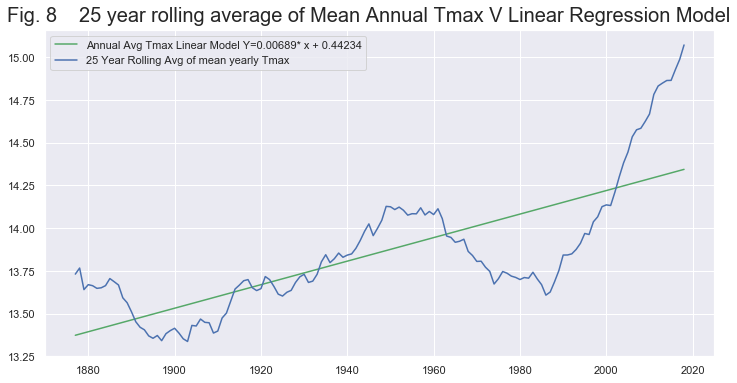

In [101]:
plt.plot(X,y_year,'-g',label='Annual Avg Tmax Linear Model Y=0.00689* x + 0.44234')
plt.plot(grouped.Year,grouped.rolling_average, label='25 Year Rolling Avg of mean yearly Tmax')
plt.figtext(.5,.9,f'Fig. 8    {rolling_average} year rolling average of Mean Annual Tmax V Linear Regression Model', 
            fontsize=20, ha='center')
plt.legend(loc='best');

In [102]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_rolling['Year'], df_rolling['rolling_average'])
print(f'slope: {slope:2.4f} \nintercept: {intercept:2.4f} \nRsquared Value: {r_value**2:2.4f} \nPvalue: {p_value:2.2f}')

slope: 0.0069 
intercept: 0.4423 
Rsquared Value: 0.5632 
Pvalue: 0.00


<p style='background-color: #8cff66;
           font-size: 18px;
          padding: 0.9em 0.5em'>From the R<sup>2</sup> value it can be concluded that the Linear Regression model only accounts for some 56.32% of the difference in temperatures.<br>Let's plot this against the residuals from the model.</p>


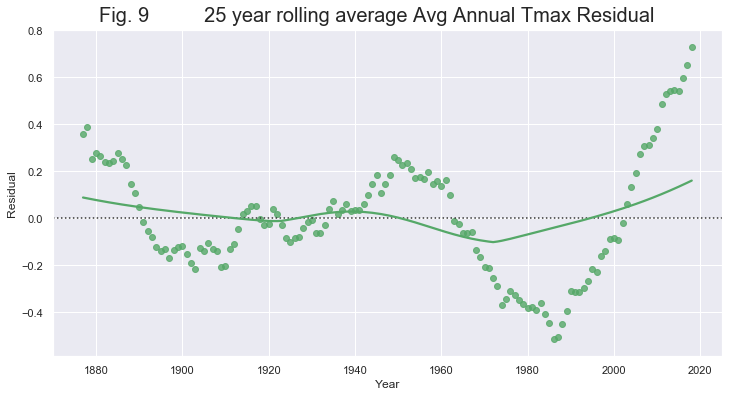

In [103]:
fig, ax = plt.subplots()
sns.residplot(df_rolling.Year,df_rolling.rolling_average, lowess=True, color="g",robust=False)
plt.figtext(.5,.9,f'Fig. 9          {rolling_average} year rolling average Avg Annual Tmax Residual', 
            fontsize=20, ha='center')
plt.xlabel('Year')
plt.ylabel(f'Residual');

<p style='background-color: #8cff66;
           font-size: 18px;
          padding: 0.9em 0.5em'>Now we see a distinct pattern in the data which suggests that a simple linear regression is not the best model.<br>
Create a new DF for the rolling average values</p>

In [104]:
df_rolling.head()

,Year,TmaxC,rolling_average
24,1877,13.858333,13.730667
25,1878,13.708333,13.766333
26,1879,10.916667,13.640000
27,1880,13.416667,13.669000
28,1881,13.266667,13.663000


In [105]:
df_rolling = pd.DataFrame(grouped.rolling_average)
df_rolling.dropna(inplace=True)
df_rolling.reset_index(inplace=True)
df_rolling.rename(columns={'index': 'Year','Rolling Average': 'RA'},inplace=True)

<p style='background-color: #8cff66;
           font-size: 18px;
          padding: 0.9em 0.5em'>Now let's try and fit a polynomial using numpy polyfit method.</p>

In [106]:
z = np.poly1d(np.polyfit(df_rolling.Year,df_rolling.rolling_average,6))

In [107]:
qw = [z(i) for i in range(24,166)]

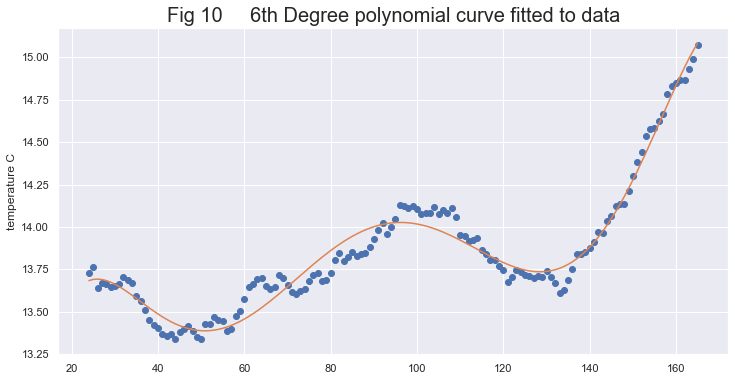

In [108]:
plt.title('Fig 10     6th Degree polynomial curve fitted to data',fontsize=20)
plt.ylabel('temperature C')
plt.plot(df_rolling.Year, df_rolling.rolling_average, 'o', label='original data')
plt.plot(df_rolling.Year,qw);

<p style='background-color: #8cff66;
           font-size: 18px;
          padding: 0.9em 0.5em'>That curve fits the data much better. There are problems with using a polynomial especially at the boundaries. They are useless at preicting past and Future values!
This a 6th degree polynomial with the equation below.</p>

In [109]:
print(z)

            6             5             4             3           2
-2.801e-11 x + 1.589e-08 x - 3.469e-06 x + 0.0003666 x - 0.01929 x + 0.4691 x + 9.501


<p style='background-color: #8cff66;
           font-size: 18px;
          padding: 0.9em 0.5em'>Let's check the predicted values based om the polynomial curve.</p>

In [110]:
df_rolling['predicted']=qw
df_rolling.sample(10)

,Year,rolling_average,predicted
38,62,13.666333,13.488117
112,136,13.751000,13.794682
122,146,14.125667,14.089736
117,141,13.911000,13.909735
23,47,13.413667,13.400699
78,102,14.084333,14.005512
118,142,13.968667,13.940590
49,73,13.624333,13.714205
31,55,13.446000,13.402270
121,145,14.066333,14.048688


<p style='background-color: #CC6621;
           font-size: 22px;
          font-weight: bold;
           padding: 0.5em 0.5em'>Checking the dta from other sources</p>

<p style='background-color: #FFCC80;
           font-size: 18px;
          padding: 0.9em 0.5em'>There are misgivings by people on the reporting of metereological data. Remember our TmaxC for June 2019 was 19.8<sup>o</sup>C from the Met Office?<br> Well here is the data from Benson in Oxfordshire for the same month. Some 14 miles South of Oxford.</p>

In [111]:
tables = pd.read_html(
    "https://www.timeanddate.com/weather/uk/oxford/historic?month=6&year=2019")
Table1 = tables[0]
Table1

,Unnamed: 0,Temperature,Humidity,Pressure
0,High,"33 °C (29 Jun, 15:50)","100% (1 Jun, 03:50)","1030 mbar (1 Jun, 03:50)"
1,Low,"5 °C (9 Jun, 03:50)","31% (29 Jun, 16:50)","998 mbar (7 Jun, 16:50)"
2,Average,15 °C,78%,1014 mbar
3,"* Reported 1 Jun 00:50 — 30 Jun 23:50, Oxford....","* Reported 1 Jun 00:50 — 30 Jun 23:50, Oxford....","* Reported 1 Jun 00:50 — 30 Jun 23:50, Oxford....","* Reported 1 Jun 00:50 — 30 Jun 23:50, Oxford...."


<p style='background-color: #FFCC80;
           font-size: 18px;
          padding: 0.9em 0.5em'><strong>Is 19.8<sup>o</sup>C an average of the TmaxC temperatures measured for June 2019?</strong><br><strong>Is  11<sup>o</sup>C the average of minimum TminC temperatures measured for June 2019?</strong><br>This will involve a bit of 'Pencil Work'!<br>First the Max temperatures by day from <strong>Benson</strong>.</p>

In [112]:
June20196TmaxC = [25,24,19,19,18,19,17,18,19,13,13,14,14,18,18,19,19,18,19,20,20,22,23,26,20,19,24,25,33,23]
print(f'The average June temperature for 2019 was: {sum(June20196TmaxC)/len(June20196TmaxC):2.2f}')

The average June temperature for 2019 was: 19.93


In [113]:
June20196TmaxC[28] = 24
round((sum(June20196TmaxC)/len(June20196TmaxC)),2)

19.63

<p style='background-color: #FFCC80;
           font-size: 18px;
          padding: 0.9em 0.5em'>Now that makes sense. The Met Office figures look like an average of the Maximum temperatures per day, averaged out at <strong>19.93<sup>o</sup>C</strong>.<br>Now for the minimum Temperatures.<br>These are recorded by the Met Office as <strong>11<sup>o</sup>C.</strong><br>It should be noted that <strong>33<sup>o</sup></strong> is a significant deviation from the other measured temperatures but there is no reason to doubt it.</p>

In [114]:
June20196TminC = [9,11,8,8,8,7,8,8,5,7,16,9,11,9,8,7,11,8,14,9,6,5,11,15,16,13,12,10,12,14]

In [115]:
print(f'The average June Minimum Temperature was {sum(June20196TminC)/len(June20196TminC):2.2f}')

The average June Minimum Temperature was 9.83


<p style='background-color: #FFCC80;
           font-size: 18px;
          padding: 0.9em 0.5em'>Now that does <strong>not</strong> make sense.<br><strong>9.83<sup>o</sup>C is significantly different from <strong>11<sup>o</sup>C.<br>Just to be sure. I will show the average as mentioned in the Benson calculation is:</p>

In [116]:
print(round(sum(June20196TmaxC)/ len(June20196TmaxC) + sum(June20196TminC) 
      / len(June20196TminC)) / 2)

14.5


<p style='background-color: #FFCC80;
           font-size: 18px;
          padding: 0.9em 0.5em'>And there we have our 15<sup>o</sup> average temperature from the Benson data.<br>Benson is a small village (pop. 4,754) out in the country which could explain the lower TminC<sup>o</sup></p>

<p style='background-color: #b8b894;
           font-size: 22px;
          font-weight: bold;
           padding: 0.5em 0.5em'>Some thoughts on the results</p>

<ul style='list-style-type: square;
               background-color: #ccccb3;
               font-size: 18px;
               padding: 0.5em 0.5em'>
    <li> A linear regreesion model fits the increase in CO<sup>2</sup> accurately.</li>
        <li>A linear regression model is useless at describing the TmaxC data for the month of July since 1850.</li>
    <li>The maximum Temperature in July has been over 26<sup>o</sup> on 5 occassions. 1911,1921,1983,2006 and 2018.</li>
        <li>A 25 year rolling average of the data for July shows a pattern of rising and falling temperatures.</li>
        <li>A 25 year rolling average of mean anuual temperatures since 1850 shows a similar pattern of rising and falling.</li>
        <li>A linear regression model for the annual mean temperatures cannot be used.</li>
        <li>A sixth degree polynomial equation fits the 25 year rolling average of annual mean temperatures..</li>
        <li>This data does not indicate a linear corelation of rising CO<sup>2</sup> with temperature.</li>
        <li>Modelling historical temperatures cannot predict future temperatures.</li>
        <li>The 'Little ice age' has been widely documented. An expectation would be that temperatures would have risen after 1850. They did. But actually cooled from the early 1960's to the late 1980's before starting to rise again.</li>
         <li>Great care is advised when looking at graphed data. The scale can make things seem worse or better as per Fig. 1.</li>
     </ul>
</p>

<p style='background-color: #00b8e6;
           font-size: 22px;
          font-weight: bold;
           padding: 0.5em 0.5em'>And there's more!</p>

<p style='background-color: #80e5ff;
           font-size: 18px;
          padding: 0.9em 0.5em'>Although this is a relatively small data sample, it is a great data set to work on.<br>I want to draw a graph with ranges of Standard Deviations from -4 to + 4 and plot the data points to get a better visual of where on a normal distribution the data points lie. I am fed up of 'anomalies'! First task is to make a copy of the original grouped DF and round the data points down to 2 places. 2 decimal places are fine.</p>

In [117]:
df_yearly_average = grouped.copy(deep=True)
df_yearly_average['TmaxC'] = df_yearly_average.TmaxC.round(2)
df_yearly_average.describe()

,Year,TmaxC,rolling_average
count,166.000000,166.000000,142.000000
mean,1935.500000,13.934096,13.858322
std,48.064193,0.846252,0.377617
min,1853.000000,10.920000,13.336333
25%,1894.250000,13.387500,13.646083
50%,1935.500000,13.805000,13.746333
75%,1976.750000,14.427500,14.044000
max,2018.000000,15.850000,15.072333


<p style='background-color: #80e5ff;
           font-size: 18px;
          padding: 0.9em 0.5em'><strong>Checking the average by taking multiple sample averages</strong><br>I want to make a quick check on the average by taking sample averages and working out an average based on the samples. This will be different everytime you run the code.</p>

In [118]:
sample_averages = []
for i in range(50):
    sample_averages.append(df_yearly_average.TmaxC.sample(30).mean())
round(sum(sample_averages)/len(sample_averages),3)

13.938

In [119]:
Yavg = round(df_yearly_average.TmaxC.mean(),2)
Ystd = round(df_yearly_average.TmaxC.std(),2)
print('Average TmaxC is ',Yavg)
print('Standard Deviation of TmaxC is ',Ystd)

Average TmaxC is  13.93
Standard Deviation of TmaxC is  0.85


<p style='background-color: #80e5ff;
           font-size: 18px;
          padding: 0.9em 0.5em'>I can then make a list of temperature ranges based on standard deviations from the average. EG. Everything falling between -3 and +3 SD's account for 99.7% of all data points.</p>

In [120]:
TmaxCrange = []
for i in range(-4,4,1):
    Temp = round(Yavg + Ystd*i,2)
    TmaxCrange.append(Temp)
TmaxCrange

[10.53, 11.38, 12.23, 13.08, 13.93, 14.78, 15.63, 16.48]

<p style='background-color: #80e5ff;
           font-size: 18px;
          padding: 0.9em 0.5em'>Let's find out the minimum and maximum tempertures for TmaxC annual average.</p>

In [121]:
print('The minimum temperture for TmaxC was ',df_yearly_average.TmaxC.min())
print('The maximum temperture for TmaxC was ',df_yearly_average.TmaxC.max())

The minimum temperture for TmaxC was  10.92
The maximum temperture for TmaxC was  15.85


<p style='background-color: #80e5ff;
           font-size: 18px;
          padding: 0.9em 0.5em'>An ugly function to check the classification.</p>

In [122]:
def classifyTemp(t,rg):
    if t < rg[1] and t > rg[0]:
        return -4
    elif t < rg[2] and t > rg[1]:
        return -3
    elif t < rg[3] and t > rg[2]:
        return -1
    elif t < rg[4] and t > rg[3]:
        return 1
    elif t < rg[5] and t > rg[4]:
        return 2
    elif t < rg[6] and t > rg[5]:
        return 3
    elif t < rg[7] and t > rg[6]:
        return 4
    else:
        return 5
        

<p style='background-color: #80e5ff;
           font-size: 18px;
          padding: 0.9em 0.5em'>Now apply the function to our average temperatures and classify them from 1 to 7. Out of interest to pythonistas, I tried several methods to do this via apply, map etc and eventually used this hack. It extracts the temperature data as a pandas series, applies the function to a list of the values, creating a new seies which is added to the original data frame.</p>

In [123]:
s123 = pd.Series(df_yearly_average.TmaxC)
df_yearly_average['classed'] = pd.Series([classifyTemp(i,TmaxCrange) for i in s123])
df_yearly_average.head()

,Year,TmaxC,rolling_average,classed
0,1853,12.82,NaN,-1
1,1854,14.07,NaN,2
2,1855,12.69,NaN,-1
3,1856,13.42,NaN,1
4,1857,14.20,NaN,2


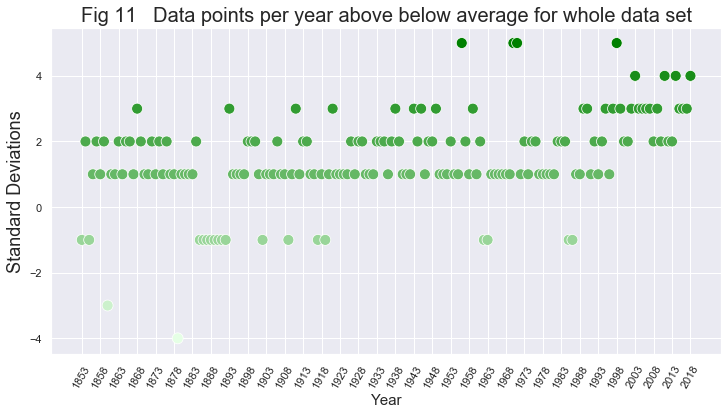

In [124]:
cmap = sns.light_palette("Green", as_cmap=True)

sns.scatterplot(x=df_yearly_average.Year,
                     y=df_yearly_average.classed,
                      size="TmaxC",
                      sizes=(120,120),
                      palette=cmap,
                      data=df_yearly_average,
                      hue='classed',
                      legend=False
                    )
plt.xticks(np.arange(min(df_yearly_average.Year), 
                     max(df_yearly_average.Year)+1, 5.0),
           rotation=60)
plt.title('Fig 11   Data points per year above below average for whole data set',fontsize=20)
plt.ylabel('Standard Deviations',fontsize = 18)
plt.xlabel('Year',fontsize = 15)
plt.show()

<p style='background-color: #80e5ff;
           font-size: 18px;
          padding: 0.9em 0.5em'>Indeed, from 1988 there is an increasing trend away from the data set average. That is there are no data points less than 1 std away from the average.
    To put it into context. The average is 13.93<sup>o</sup> and the highest temperature was 15.85<sup>o</sup>and 15.63<sup>o</sup> is 2 std above average. In the Scottish vernacular, we are talking baw hairs. Remember, I told you to beware of graph scales.</p>

<p style='background-color: #80e5ff;
           font-size: 18px;
          padding: 0.9em 0.5em'><strong>Are you sick of seeing 2d plots with a line through them?</strong><br> Like the plot below of all TmaxC data in the original file?.</p>

In [125]:
ow_x = [i for i in range(len(oweather))]

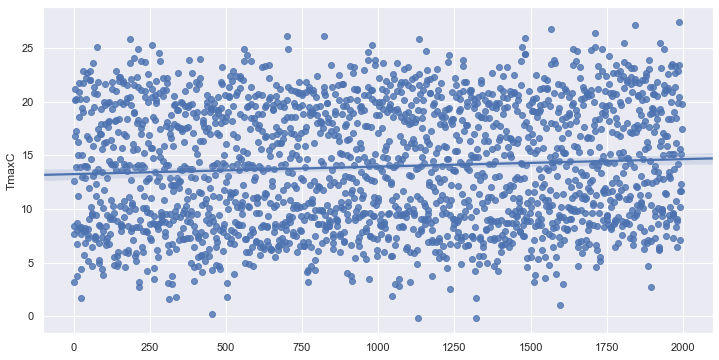

In [126]:
sns.regplot(ow_x,oweather.TmaxC);

<p style='background-color: #80e5ff;
           font-size: 18px;
          padding: 0.9em 0.5em'>Here is a 3D representation of the same data as Fig. 2. If you uncomment the line '%matplotlib qt', a separate window will open and you can rotate the graph. </p>

In [127]:
oweather.describe
df_temp = pd.DataFrame()

df_temp['X'] = oweather.Year
df_temp['Y'] = oweather.Month
df_temp['Z'] = oweather.TmaxC

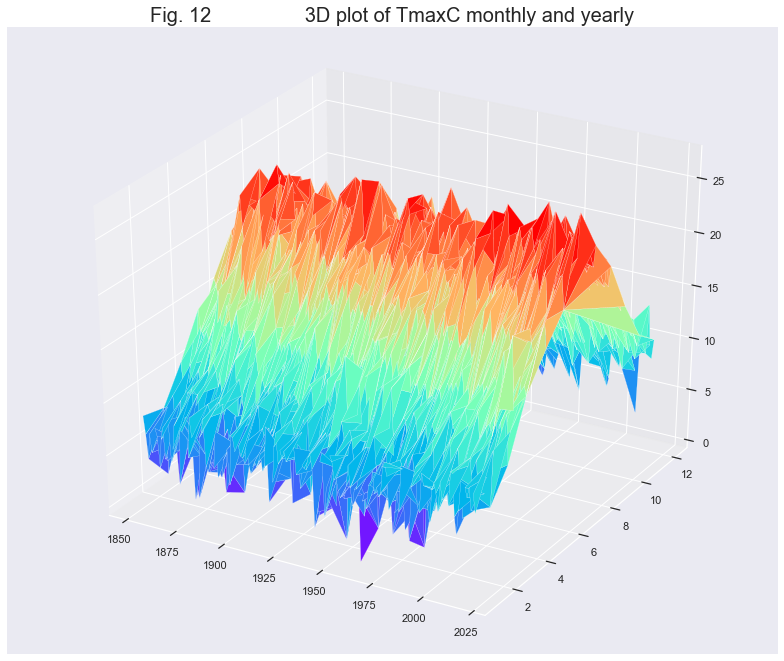

In [182]:
#%matplotlib qt
#%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(11,9))

ax = fig.gca(projection='3d')
ax.plot_trisurf(df_temp.X, df_temp.Y,df_temp.Z,cmap=plt.cm.rainbow, linewidth=0.2)
fig.tight_layout()
plt.title('Fig. 12                 3D plot of TmaxC monthly and yearly',fontsize=20)
plt.show()

<p style='background-color: #8cff66;
           font-size: 18px;
           padding: 0.9em 0.5em'>
There is wonderful resource on using matplotlib <strong><a href="https://python-graph-gallery.com" > here.</a></strong> which is where I pinched most of the code for these graphs. The code below is probably more interesting to Python programmers
</p>

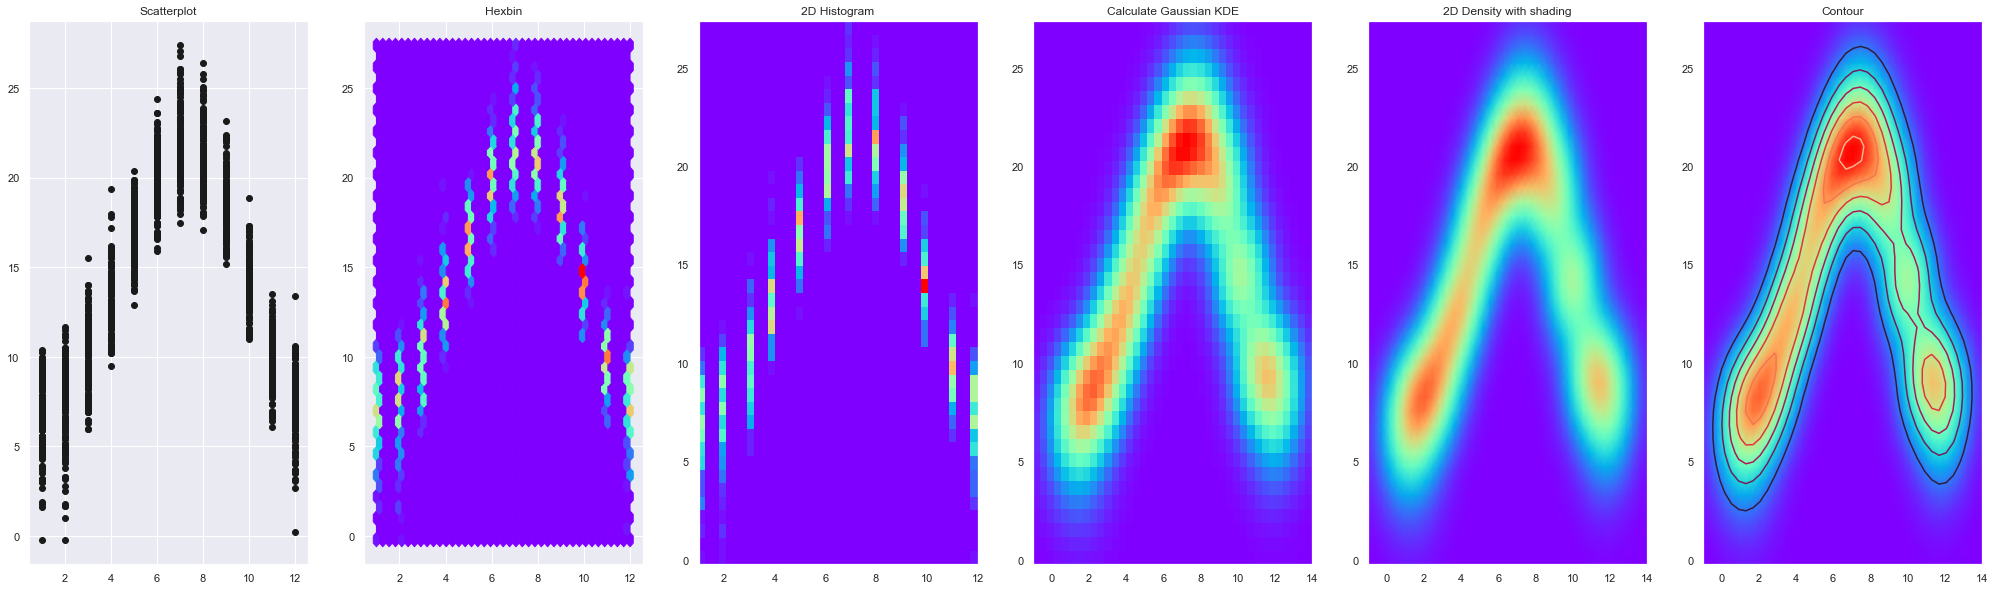

In [291]:
#x = df_temp.X #Year
#y = df_temp.Z #TmaxC

data = df_temp[['Y', 'Z']].to_numpy()     #This is about the only change I made to the code.
x,y = data.T

fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(35, 10))
 
# Everything sarts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].plot(x, y, 'ko')
# As you can see there is a lot of overplottin here!
 
# Thus we can cut the plotting window in several hexbins
nbins = 40
axes[1].set_title('Hexbin')
axes[1].hexbin(x, y, gridsize=nbins, cmap=plt.cm.rainbow)
 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(x, y, bins=nbins, cmap=plt.cm.rainbow)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min()-2:x.max()+2:nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
axes[3].set_title('Calculate Gaussian KDE')
axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.rainbow)
 
# add shading
axes[4].set_title('2D Density with shading')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.rainbow)
 
# contour
axes[5].set_title('Contour')
axes[5].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.rainbow)
axes[5].contour(xi, yi, zi.reshape(xi.shape) )


<p style='background-color: #80e5ff;
           font-size: 18px;
          padding: 0.9em 0.5em'>Graph 6 above labelled 'Contour' is interesting in that it would seem to show a hot spot in February - March time and in November.<br>Well not exactly 'hot'. More a concentration of temperatures at the Y axis level. </p>

Text(0, 0.5, 'Temp centigrade')

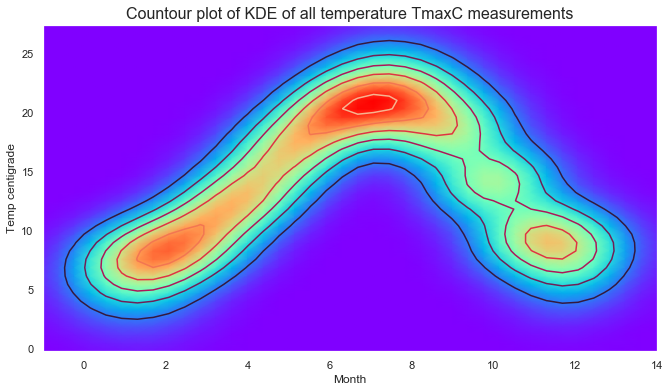

In [181]:
plt.figure(figsize = (11,6))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.rainbow)
plt.contour(xi, yi, zi.reshape(xi.shape) )
plt.title('Countour plot of KDE of all temperature TmaxC measurements',fontsize=16)
plt.xlabel('Month')
plt.ylabel('Temp centigrade')

<p style='background-color: #80e5ff;
           font-size: 18px;
          padding: 0.9em 0.5em'>It's important to know what we are looking at here. This is essentially a 'shadow' of Fig. 12's Kernel Densities in 2D. And these are for TmaxC. it shows the probability of temperatures for each month based on the period 1853 - 2018.<br> So one thought that occurrs to me is that a sequence of these plots based on a 25 year period ( 7 graphs) could give a better visual clue as to how temperatures have moved over the period of the data set.<br>
<ul style='list-style-type: square;
               background-color: #80e5ff;
               font-size: 18px;
               padding: 0.5em 0.5em'>
    <li> 1853 - 1877</li>
     <li>1878 - 1902</li>
    <li>1903 - 1928</li>
     <li>1929 - 1954</li>
     <li>1955 -1980</li>
     <li>1981 - 2006</li>
     <li>2007 - 2018</li>
     </ul>
</p>

# so lets go the long way round before refactoring

In [220]:
#76 data frames check out for the splits

df_temp1 = df_temp[0:300]
df_temp2 = df_temp[300:600]
df_temp3 = df_temp[600:900]
df_temp4 = df_temp[900:1200]
df_temp5 = df_temp[1200:1500]
df_temp6 = df_temp[1500:1800]
df_temp7 = df_temp[1800:]

## lets try graph 1

Text(0, 0.5, 'Temp centigrade')

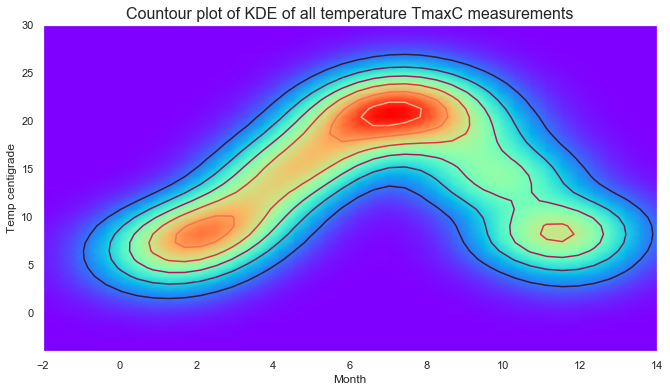

In [292]:
data = df_temp1[['Y', 'Z']].to_numpy()     #This is about the only change I made to the code.
x,y = data.T

k = kde.gaussian_kde(data.T)
#xi, yi = np.mgrid[x.min()-2:x.max()+2:nbins*1j, y.min():y.max():nbins*1j]
xi, yi = np.mgrid[-2:x.max()+2:nbins*1j, -4:30:nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
plt.figure(figsize = (11,6))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.rainbow)
plt.contour(xi, yi, zi.reshape(xi.shape) )
plt.title('Countour plot of KDE of all temperature TmaxC measurements',fontsize=16)
plt.xlabel('Month')
plt.ylabel('Temp centigrade')

Text(0, 0.5, 'Temp centigrade')

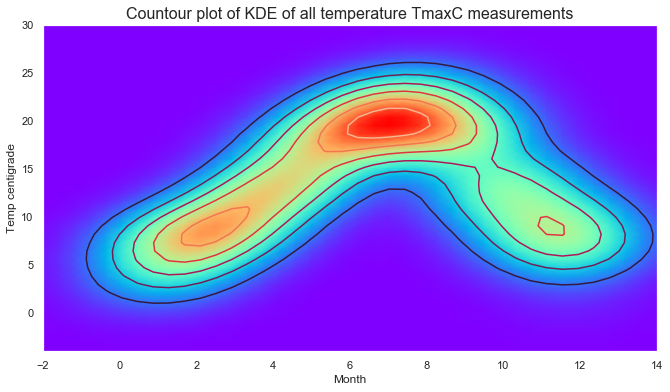

In [293]:
data = df_temp2[['Y', 'Z']].to_numpy()     #This is about the only change I made to the code.
x,y = data.T

k = kde.gaussian_kde(data.T)
#xi, yi = np.mgrid[x.min()-2:x.max()+2:nbins*1j, y.min():y.max():nbins*1j]
xi, yi = np.mgrid[-2:x.max()+2:nbins*1j, -4:30:nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
plt.figure(figsize = (11,6))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.rainbow)
plt.contour(xi, yi, zi.reshape(xi.shape) )
plt.title('Countour plot of KDE of all temperature TmaxC measurements',fontsize=16)
plt.xlabel('Month')
plt.ylabel('Temp centigrade')

Text(0, 0.5, 'Temp centigrade')

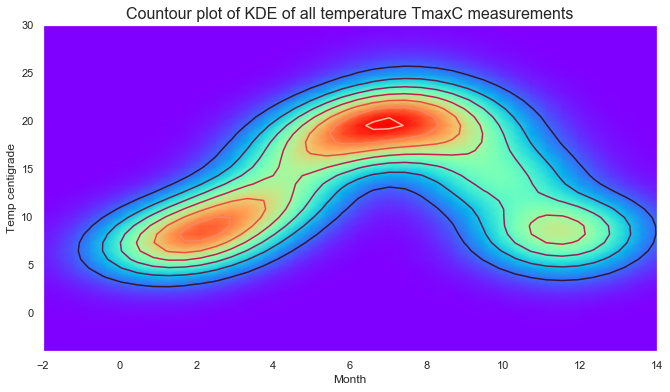

In [294]:
data = df_temp3[['Y', 'Z']].to_numpy()     #This is about the only change I made to the code.
x,y = data.T

k = kde.gaussian_kde(data.T)
#xi, yi = np.mgrid[x.min()-2:x.max()+2:nbins*1j, y.min():y.max():nbins*1j]
xi, yi = np.mgrid[-2:x.max()+2:nbins*1j, -4:30:nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
plt.figure(figsize = (11,6))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.rainbow)
plt.contour(xi, yi, zi.reshape(xi.shape) )
plt.title('Countour plot of KDE of all temperature TmaxC measurements',fontsize=16)
plt.xlabel('Month')
plt.ylabel('Temp centigrade')

Text(0, 0.5, 'Temp centigrade')

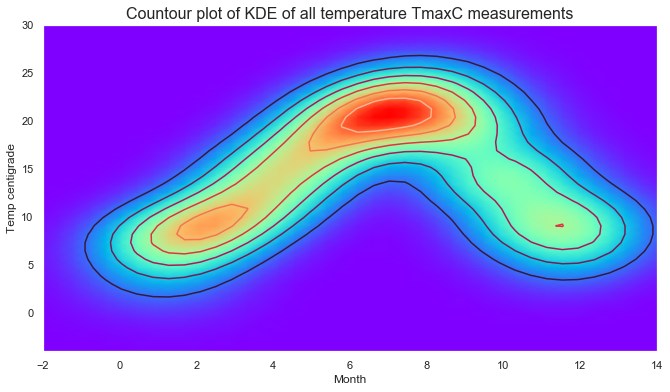

In [295]:
data = df_temp4[['Y', 'Z']].to_numpy()     #This is about the only change I made to the code.
x,y = data.T

k = kde.gaussian_kde(data.T)
#xi, yi = np.mgrid[x.min()-2:x.max()+2:nbins*1j, y.min():y.max():nbins*1j]
xi, yi = np.mgrid[-2:x.max()+2:nbins*1j, -4:30:nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
plt.figure(figsize = (11,6))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.rainbow)
plt.contour(xi, yi, zi.reshape(xi.shape) )
plt.title('Countour plot of KDE of all temperature TmaxC measurements',fontsize=16)
plt.xlabel('Month')
plt.ylabel('Temp centigrade')

Text(0, 0.5, 'Temp centigrade')

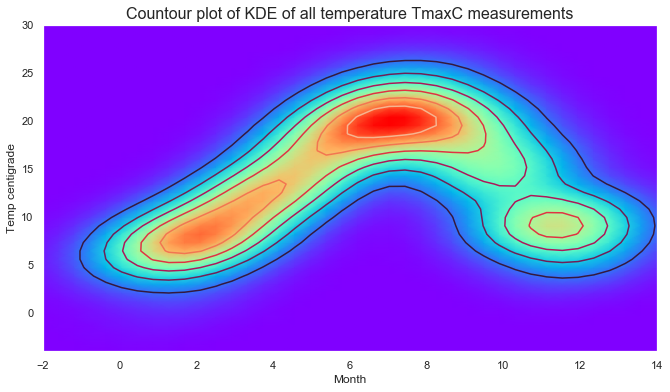

In [296]:
data = df_temp5[['Y', 'Z']].to_numpy()     #This is about the only change I made to the code.
x,y = data.T

k = kde.gaussian_kde(data.T)
#xi, yi = np.mgrid[x.min()-2:x.max()+2:nbins*1j, y.min():y.max():nbins*1j]
xi, yi = np.mgrid[-2:x.max()+2:nbins*1j, -4:30:nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
plt.figure(figsize = (11,6))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.rainbow)
plt.contour(xi, yi, zi.reshape(xi.shape) )
plt.title('Countour plot of KDE of all temperature TmaxC measurements',fontsize=16)
plt.xlabel('Month')
plt.ylabel('Temp centigrade')

Text(0, 0.5, 'Temp centigrade')

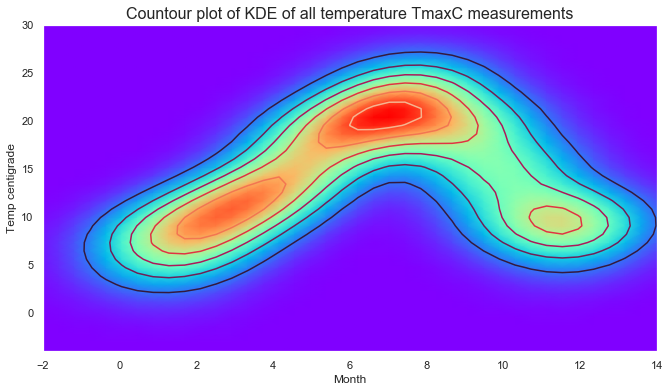

In [297]:
data = df_temp6[['Y', 'Z']].to_numpy()     #This is about the only change I made to the code.
x,y = data.T

k = kde.gaussian_kde(data.T)
#xi, yi = np.mgrid[x.min()-2:x.max()+2:nbins*1j, y.min():y.max():nbins*1j]
xi, yi = np.mgrid[-2:x.max()+2:nbins*1j, -4:30:nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
plt.figure(figsize = (11,6))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.rainbow)
plt.contour(xi, yi, zi.reshape(xi.shape) )
plt.title('Countour plot of KDE of all temperature TmaxC measurements',fontsize=16)
plt.xlabel('Month')
plt.ylabel('Temp centigrade')

Text(0, 0.5, 'Temp centigrade')

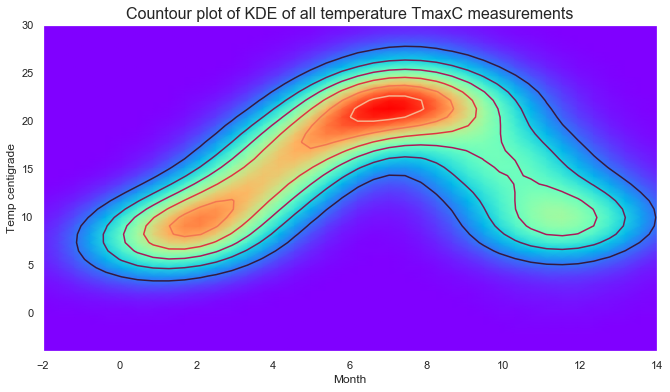

In [298]:
data = df_temp7[['Y', 'Z']].to_numpy()     #This is about the only change I made to the code.
x,y = data.T

k = kde.gaussian_kde(data.T)
#xi, yi = np.mgrid[x.min()-2:x.max()+2:nbins*1j, y.min():y.max():nbins*1j]
xi, yi = np.mgrid[-2:x.max()+2:nbins*1j, -4:30:nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
plt.figure(figsize = (11,6))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.rainbow)
plt.contour(xi, yi, zi.reshape(xi.shape) )
plt.title('Countour plot of KDE of all temperature TmaxC measurements',fontsize=16)
plt.xlabel('Month')
plt.ylabel('Temp centigrade')